In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.tools import load_dataset

from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=load_dataset()

In [3]:
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 20})
sns.set(font="Lucida Sans Unicode")
sns.set_theme(style='white')

palette=['#ac2432', '#452c28', '#9b7d52']

# 01 First considerations on data

We can see from the processing below that none of the dimension contains null values. We have 38 features + 1 target variable. The total number of entries is 260601. The target labels are unbalanced. The label 2 seems to be the most frequent and the label 1 the less frequent label. This can be problematic for the model. 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


In [5]:
df.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [6]:
# Check if there exists some null attribute

any(df.isnull().sum().T != 0)

False

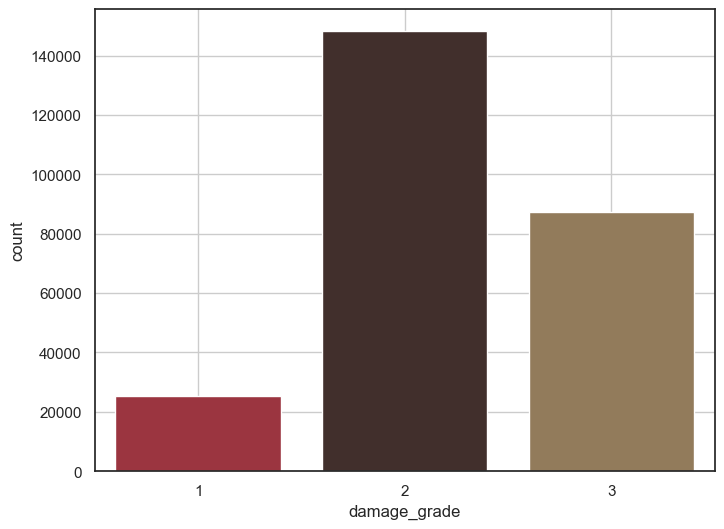

In [7]:
_, _ = plt.subplots(figsize = (8, 6))

sns.countplot(x = df['damage_grade'], palette=palette)

plt.grid(True)
plt.show()

# 02  Analysis of numerical features

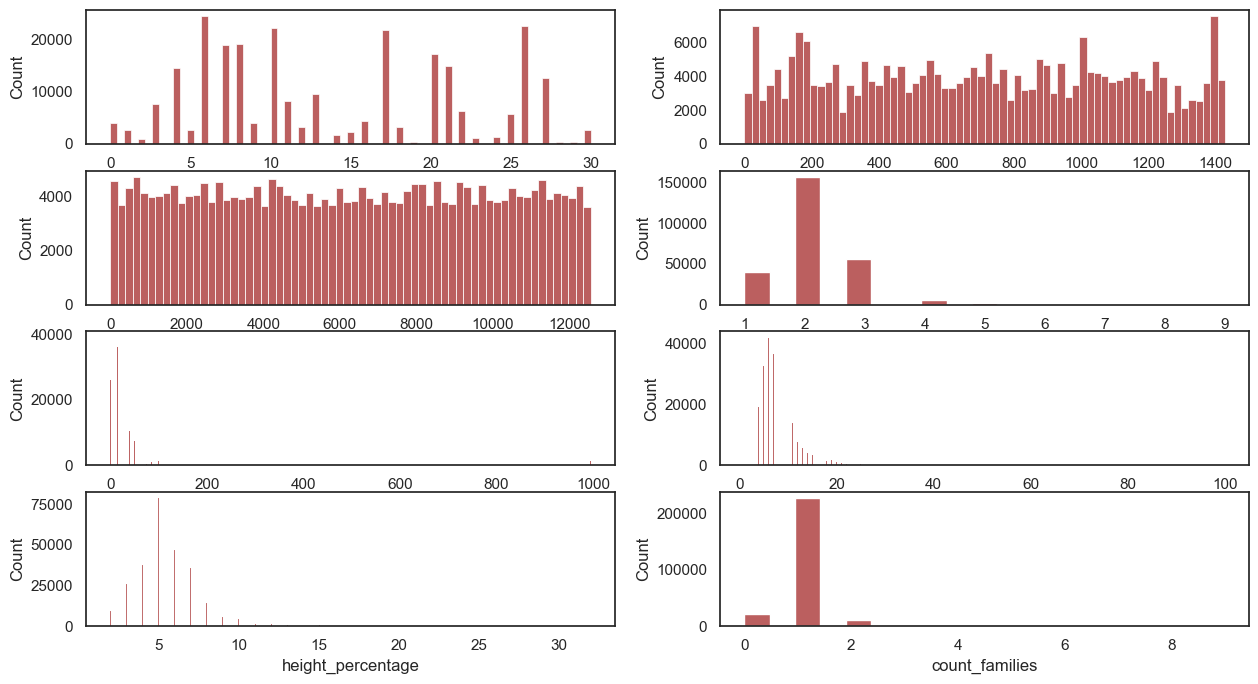

In [8]:
fig, axs = plt.subplots(4, 2, figsize = (15, 8))

sns.histplot(df['geo_level_1_id'], ax = axs[0][0], color = 'brown')
sns.histplot(df['geo_level_2_id'], ax = axs[0][1], color = 'brown')
sns.histplot(df['geo_level_3_id'], ax = axs[1][0], color = 'brown')
sns.histplot(df['count_floors_pre_eq'], ax = axs[1][1], color = 'brown')
sns.histplot(df['age'], ax =  axs[2][0], color = 'brown')
sns.histplot(df['area_percentage'], ax = axs[2][1], color = 'brown')
sns.histplot(df['height_percentage'], ax = axs[3][0], color = 'brown')
sns.histplot(df['count_families'], ax = axs[3][1], color = 'brown')

plt.show()

The data concerning the geo levels 2 and 3 seems almost uniformly distributed. The geo level 1, instead is more complex. It is difficult to analyze the other attributes from these plots due to the presence of outliers. We will make a separate plot. In all cases, though, seems like a normalization or the use of a log scale would benefit. Then the next step would be to analyze the same features with respect to the target variable.

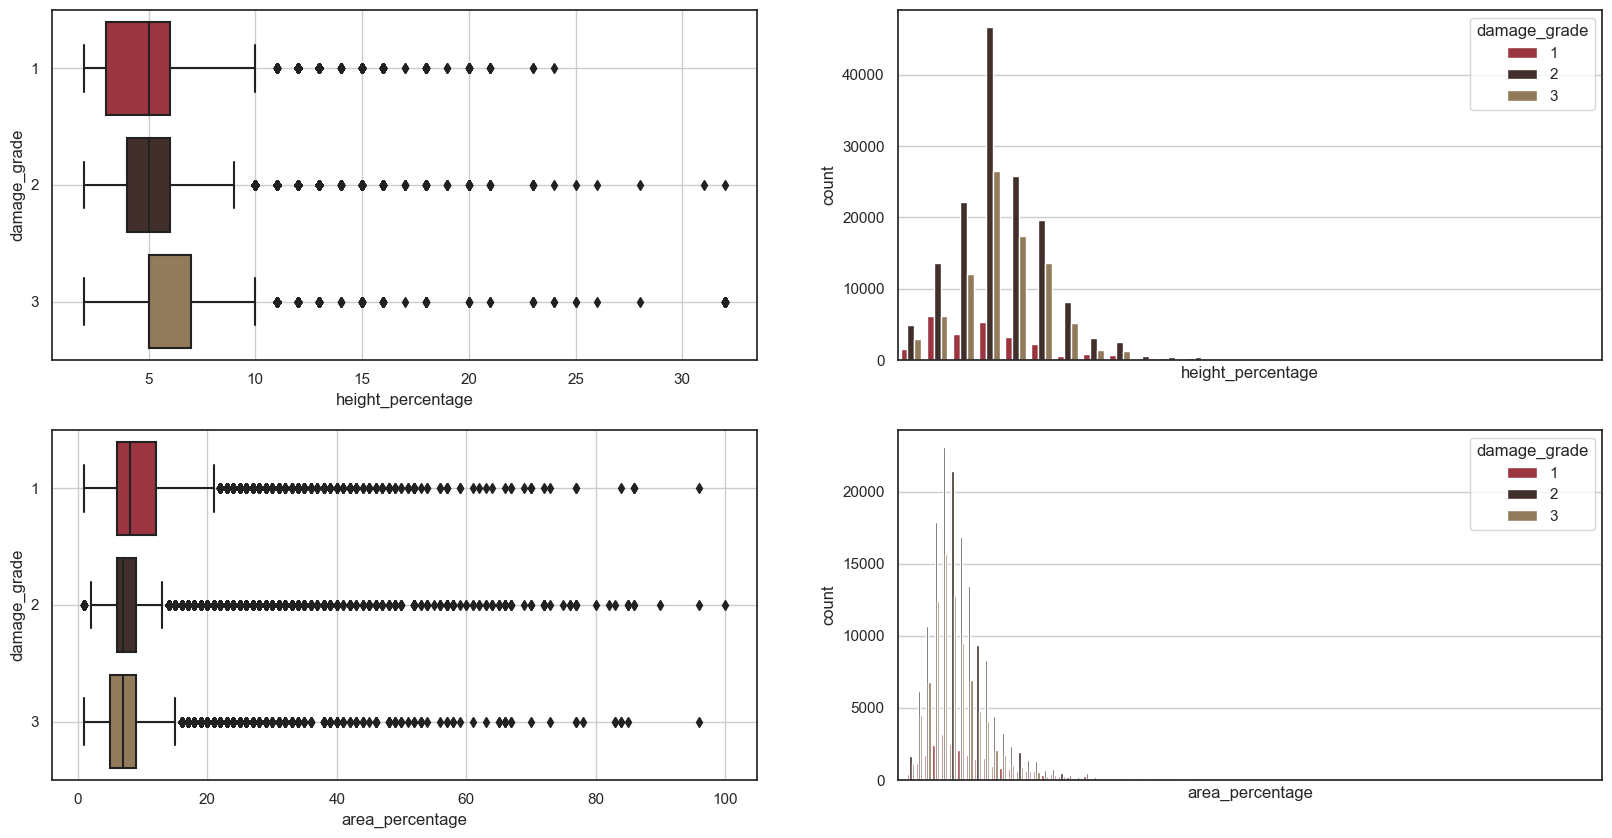

In [9]:
_, axs = plt.subplots(2, 2, figsize = (20, 10))

"""
Recall that a boxplot is divaded in 5 number summary: minimum, maximum, sample median, and the first and the third quantiles.
The minimum (0th percentile) is the lows data point in the data set excluding any outliers.
The maximum (100th percentile) is the highest data point in the data set excluding any outliers.
The median (50th percentile) is the middle value in the data set.
The first quantile (25th percentile) is the median of the lower half of the data set.
The third quantile (75th percentile) is the median of the upper half of the data set.

(Source: Wikipedia)

"""

sns.boxplot(data = df, x = "height_percentage", y = "damage_grade", orient = "h", ax = axs[0][0], palette=palette)
sns.countplot(data = df, x = "height_percentage", hue = "damage_grade", ax = axs[0][1], palette=palette)
sns.boxplot(data = df, x = "area_percentage", y = "damage_grade", orient = "h", ax = axs[1][0], palette=palette)
sns.countplot(data = df, x = "area_percentage", hue = "damage_grade", ax = axs[1][1], palette=palette)

axs[0][1].set_xticks([])
axs[1][1].set_xticks([])

axs[0][0].grid(visible=True)
axs[0][1].grid(visible=True)
axs[1][0].grid(visible=True)
axs[1][1].grid(visible=True)


plt.grid(True)

plt.show()

The height percentage seems not to go beyond the 32%. The area percentage is a difficult feature, since the high presence of value that cross the std threshold. Maybe it would be better to normalize it with a MinMaxScaler, even though the range of values stands between 0 and 100 which is not a very large range. 

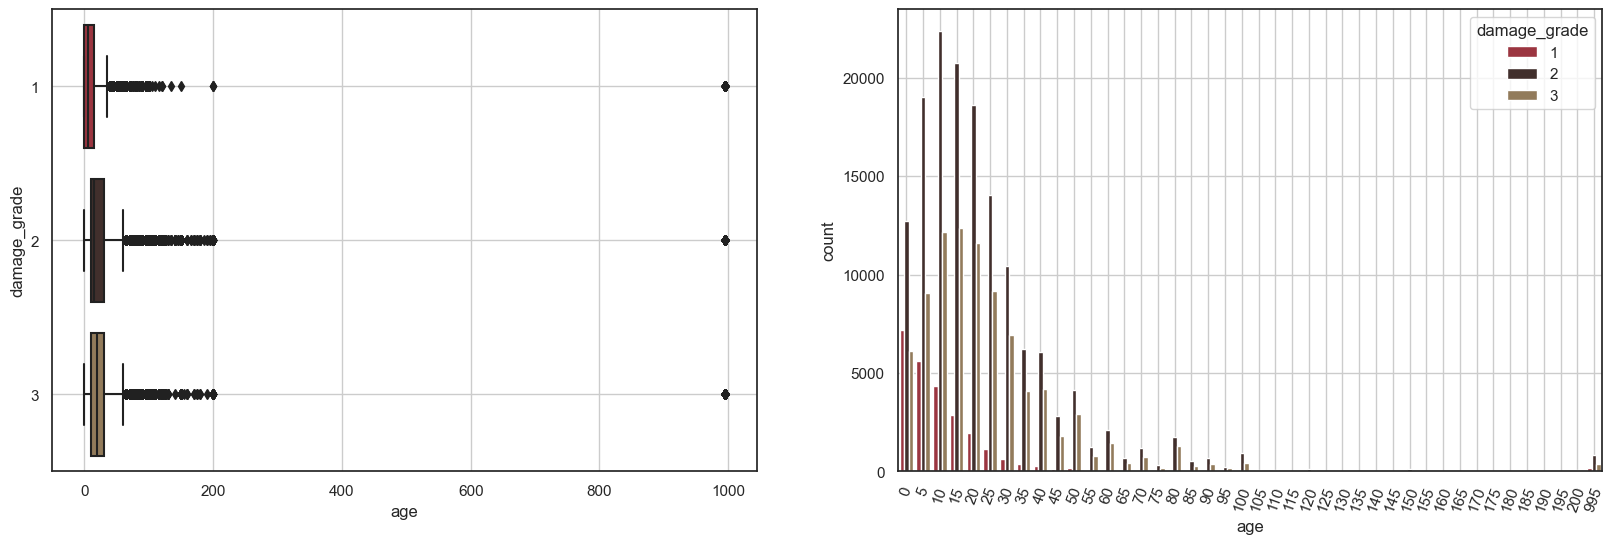

In [10]:
_, axs = plt.subplots(1, 2, figsize = (20, 6))

sns.boxplot(data = df, x = "age", y = "damage_grade", ax = axs[0], orient = "h", palette=palette)
sns.countplot(data = df, x = "age", hue = "damage_grade", ax =  axs[1], palette=palette)

plt.xticks(rotation = 70)

axs[0].grid(visible=True)
axs[1].grid(visible=True)

plt.show()

Here the values need for certain a normalization. The presence of outliers can mislead a predictor and it would be better for us to deal with those.

For curiosity: Kasthamandap is a building 1000 y.o. in the region and it was the oldest building in Kathmandu. All these outliers exists.

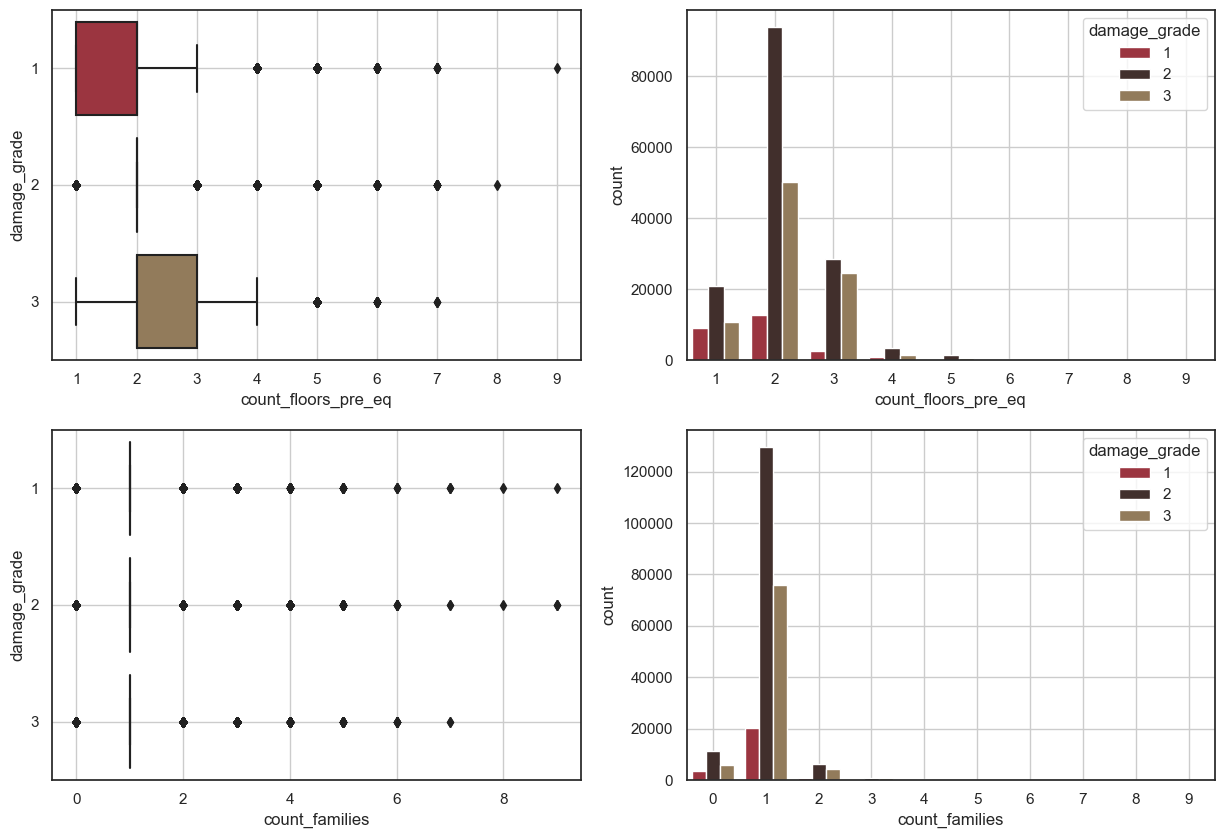

In [11]:
_, axs = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(data = df, x = 'count_floors_pre_eq', y = 'damage_grade', ax = axs[0][0], orient = 'h', palette=palette)
sns.countplot(data = df, x = 'count_floors_pre_eq', hue = 'damage_grade', ax = axs[0][1], palette=palette)
sns.boxplot(data = df, x = 'count_families', y = 'damage_grade', ax = axs[1][0], orient = 'h', palette=palette)
sns.countplot(data = df, x = 'count_families', hue = 'damage_grade', ax = axs[1][1], palette=palette)

axs[0][0].grid(visible=True)
axs[0][1].grid(visible=True)
axs[1][0].grid(visible=True)
axs[1][1].grid(visible=True)

plt.show()

Even in this case, there is the presence of outliers. But in this case they can be neglected maybe since the range of values is not very large and the number of data outside the 75th percentile is very low. 

# 03 Correlation Analysis

It seems that not many features are correlated. From the analysis above, only high correlation seems to be between count_floors_pre_eq and height_percentage (this was expected since higher buildings have more floors), and has_secondary_use and has_secondary_use_agriculture. The correlation though is not high enough to lead to a certain discard of the features. 

C:\Users\Dario\AppData\Local\Temp\ipykernel_5876\2553650548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


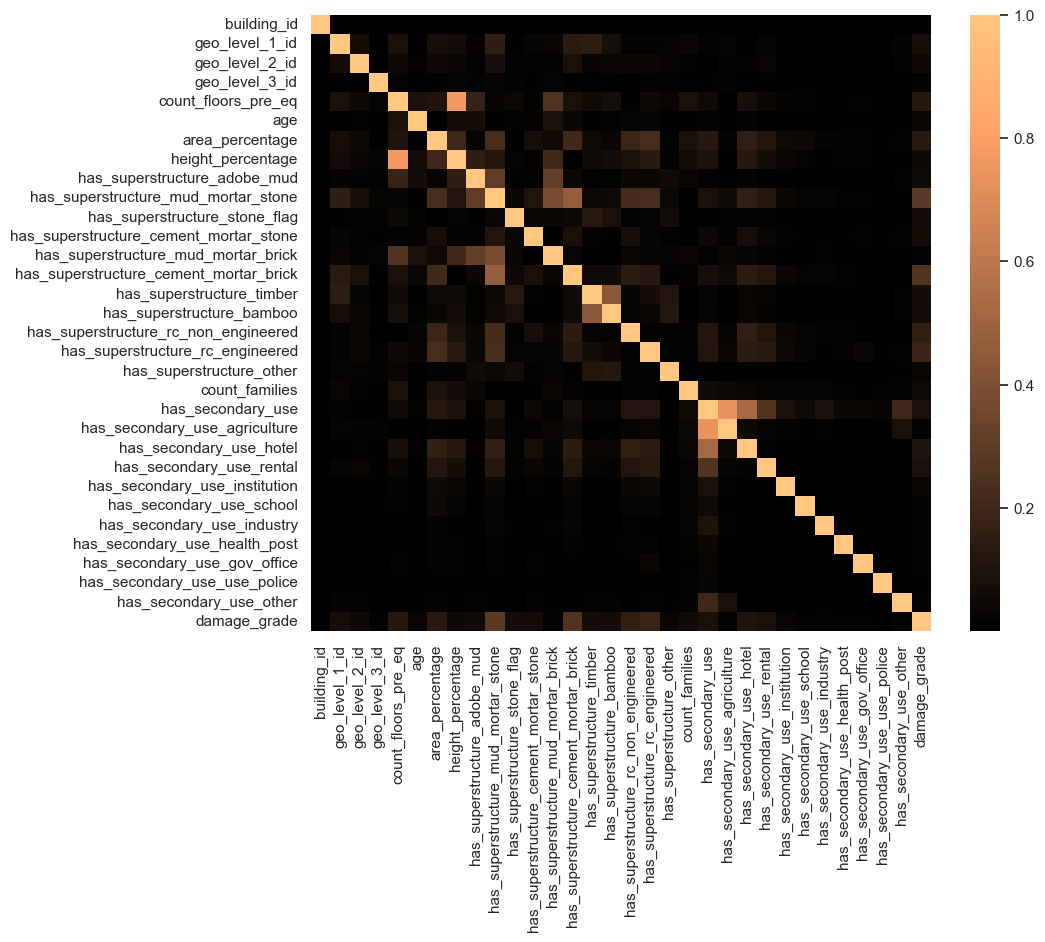

In [12]:
corr_matrix = df.corr().abs()

plt.subplots(figsize = (10, 8))

sns.heatmap(corr_matrix, cmap = 'copper')

plt.show()

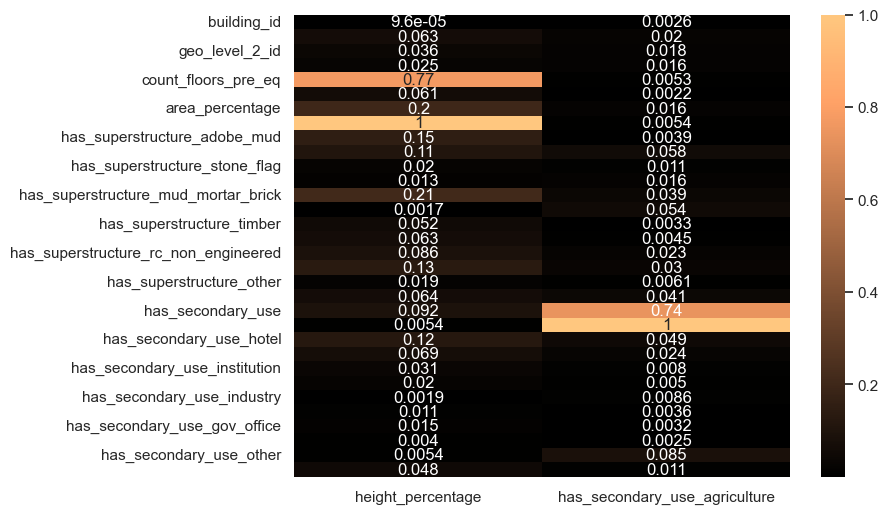

In [13]:
# We select the upper triangular matrix (no difference with the lower)

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

plt.subplots(figsize = (8, 6))

sns.heatmap(corr_matrix[high_corr_features], cmap = 'copper', annot = True)

plt.show()

# 04 Feature Importance

We are going to analize the features's importance acording to the F-test and the mean decrease in impurity in a Random Forest. Both these methods requires a one hot encoding of the categorical features

In [14]:
df=load_dataset()
categorical_features=["legal_ownership_status","land_surface_condition",
                    "foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration"]

df = pd.get_dummies(df, columns=categorical_features)

X = df.drop(columns = ["damage_grade", "building_id"])
y = df["damage_grade"]
features=list(X)

### ANOVA

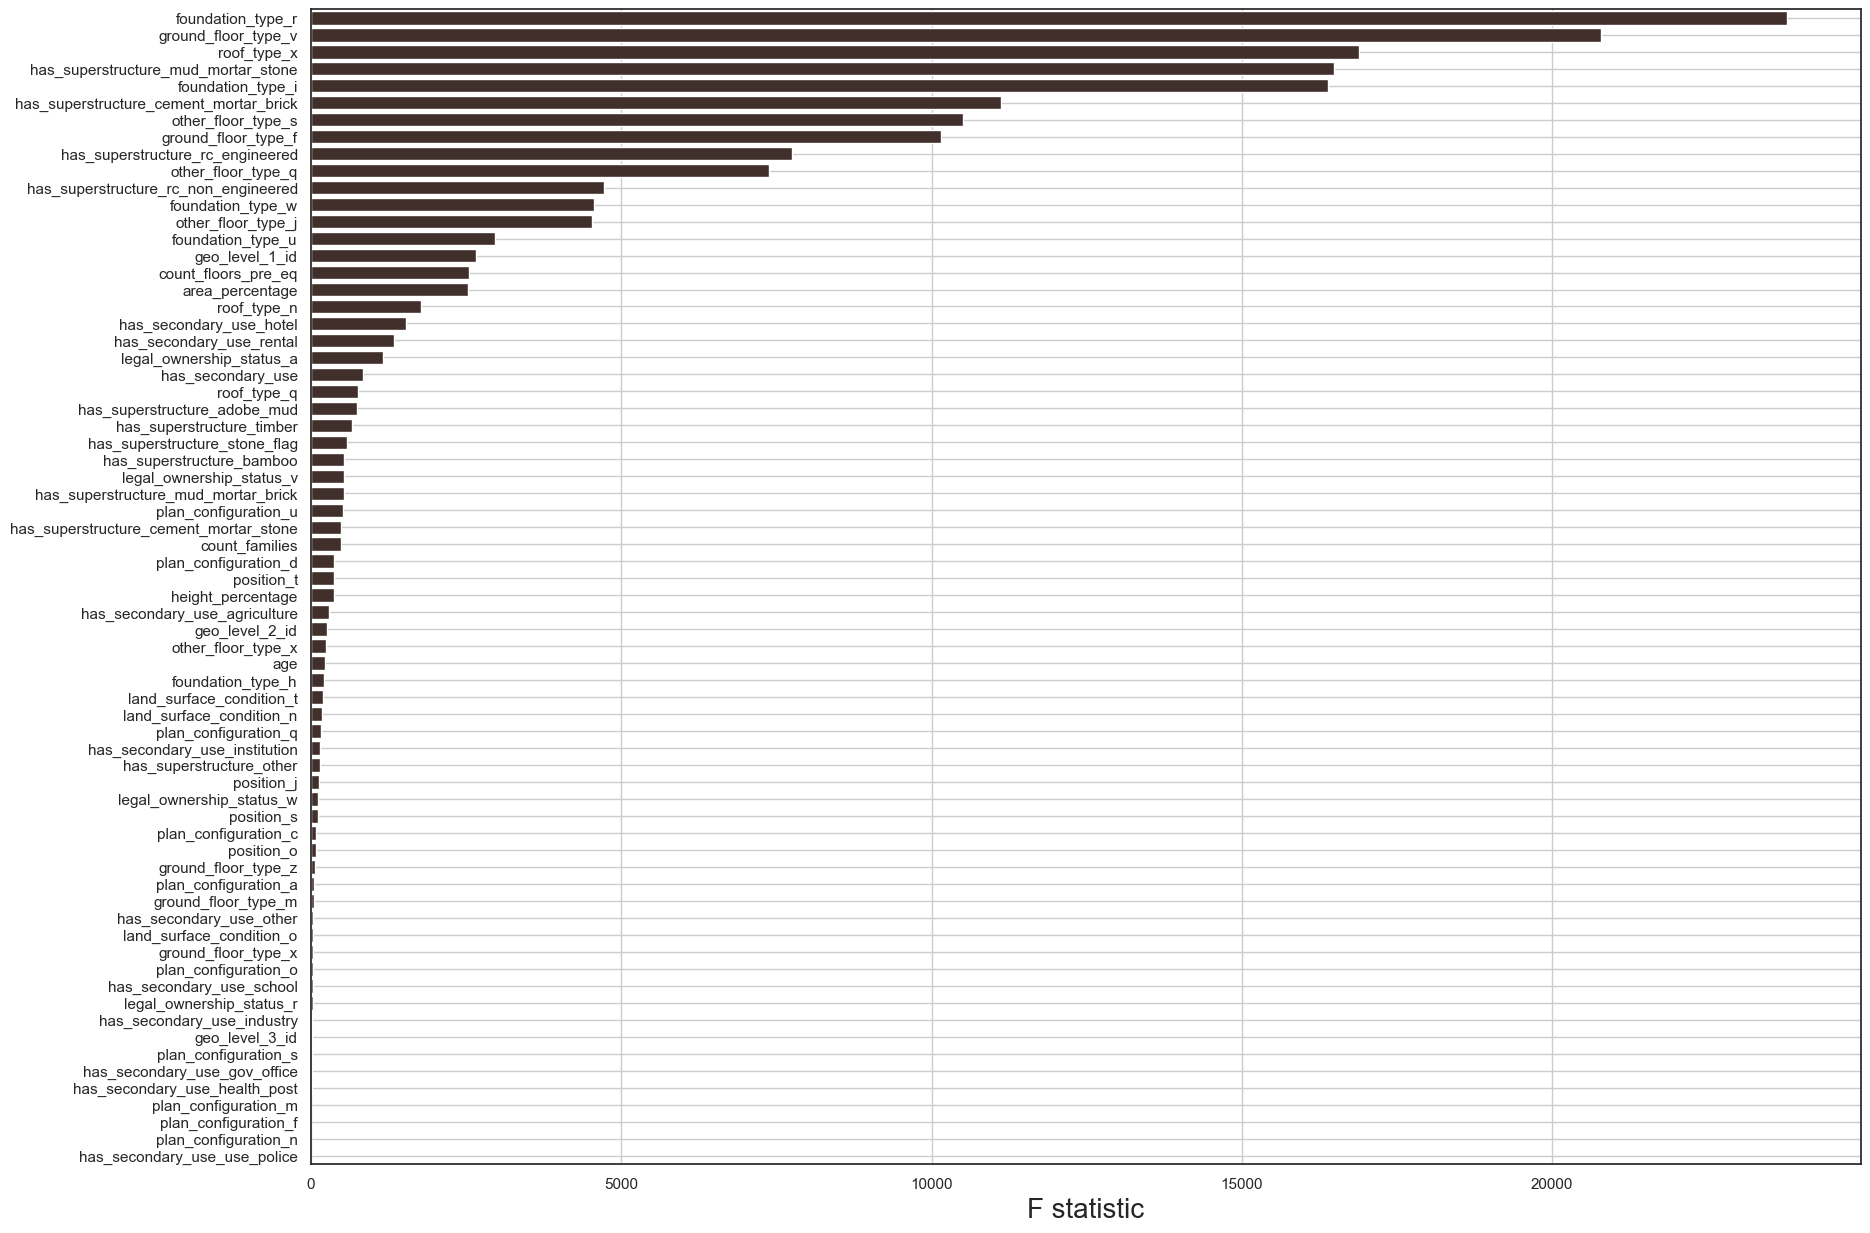

In [20]:
FStat, p_value = f_classif(X, y)


anova_df=pd.DataFrame()
anova_df['features']=features
anova_df['FStat']=FStat
anova_df['p_value']=p_value

anova_df=anova_df.set_index('features')
anova_df=anova_df.sort_values('FStat', ascending=False)
#anova_df=anova_df.iloc[0:10] #show the top 10

_, ax = plt.subplots(figsize=(20,15))
sns.barplot(y = anova_df.index, x = anova_df['FStat'], color=palette[1], ax=ax)
plt.grid(True)
ax.set_xlabel("F statistic", fontsize=20)
ax.set_ylabel("")
plt.show()

In [16]:
anova_df

,FStat,p_value
features,,
foundation_type_r,23787.275036,0.000000
ground_floor_type_v,20782.933584,0.000000
roof_type_x,16891.038184,0.000000
has_superstructure_mud_mortar_stone,16490.386507,0.000000
foundation_type_i,16385.772905,0.000000
...,...,...
has_secondary_use_health_post,9.872682,0.000052
plan_configuration_m,6.823243,0.001088
plan_configuration_f,1.671670,0.187935


### Random Forest

In [17]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

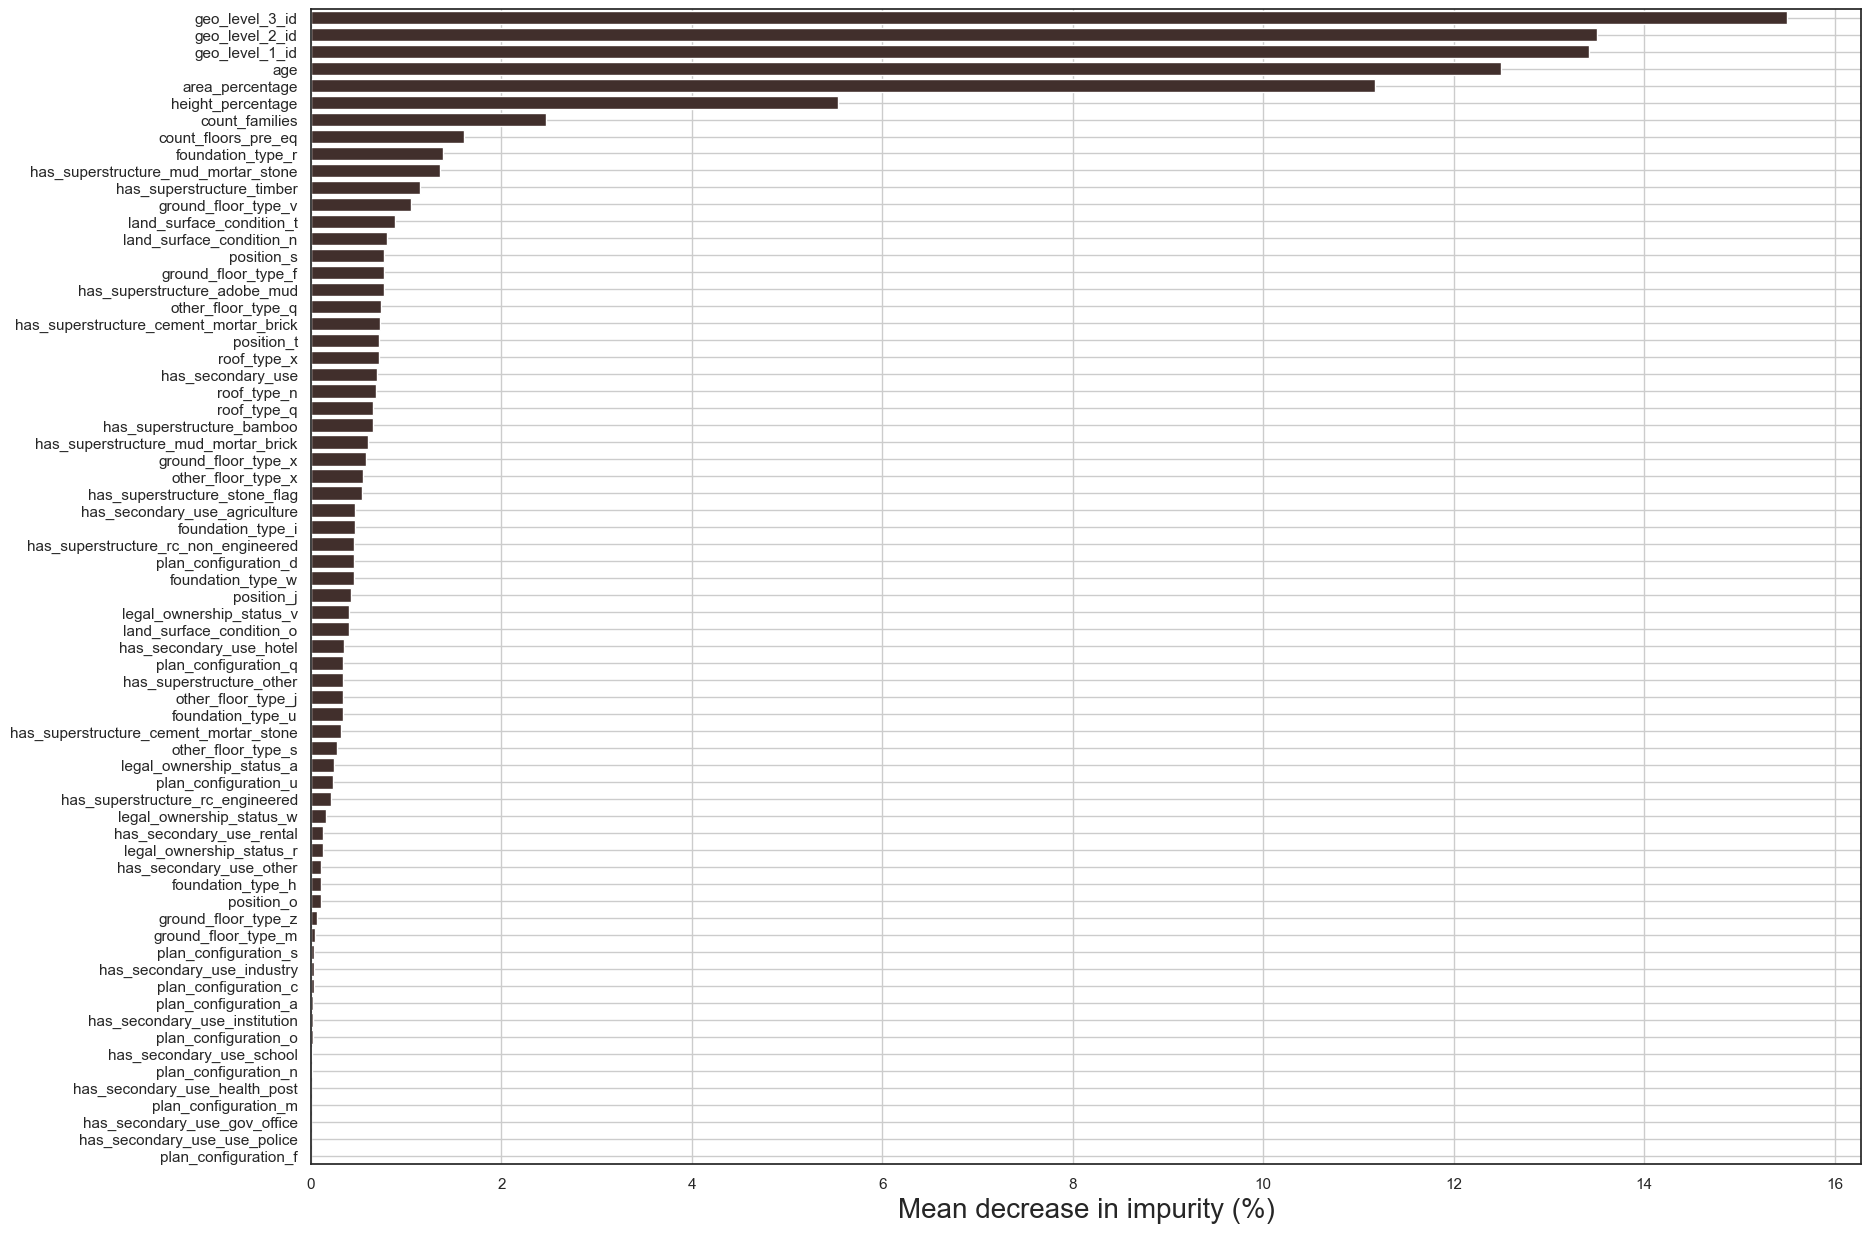

In [21]:
features_importance = pd.Series(rf.feature_importances_, index=features)

features_importance=features_importance.sort_values(ascending=False)
#features_importance=features_importance.iloc[0:10] #show the top 10

_, ax = plt.subplots(figsize=(20,15))
sns.barplot(y = features_importance.index, x = features_importance*100, color=palette[1], ax=ax)
plt.grid(True)
ax.set_xlabel("Mean decrease in impurity (%)", fontsize=20)
ax.set_ylabel("")

plt.show()